In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [23]:
df = pd.read_csv("diabetes.csv")

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


all patients here are females at least 21 years old of Pima Indian heritage 

Все пациенты здесь это женщины от 21 года (Pima Indian heritage)

Датасет https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset/data 

In [24]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
# Замена нулей медианой для признака Glucose

df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())


Датасет очень качественный без отсутствуещих значений, но тут есть нули они могут быть пропущенными значениями так что ставим медияну

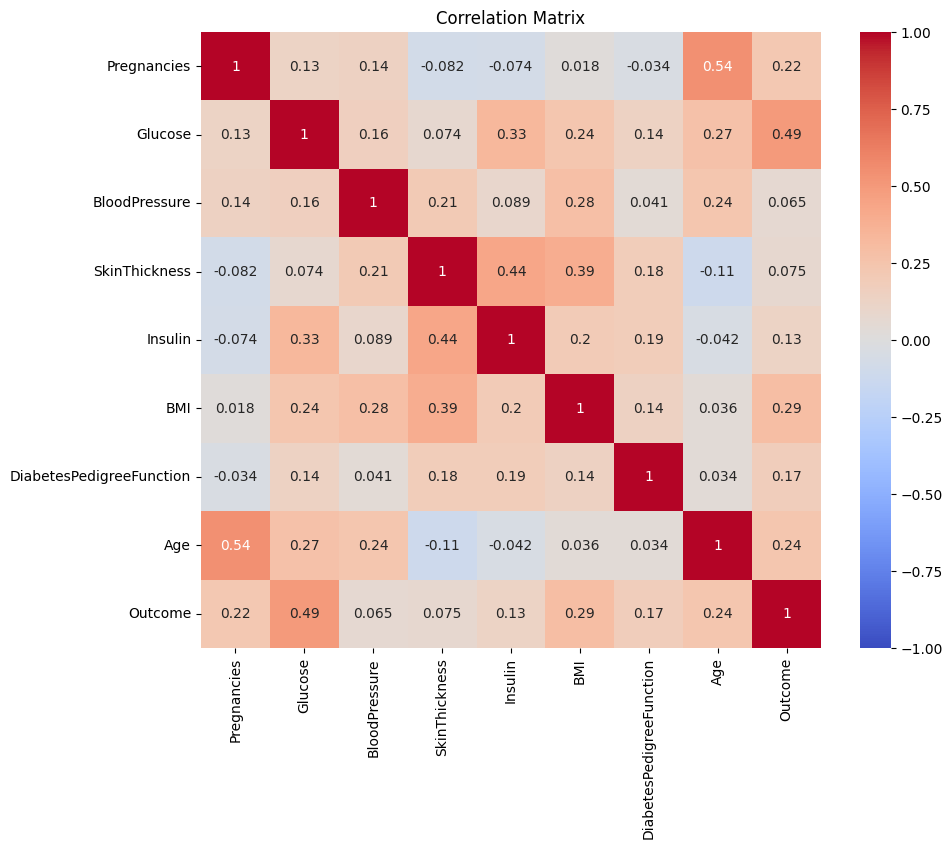

In [26]:
import seaborn as sns

import matplotlib.pyplot as plt



correlation_matrix = df.corr()



plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title("Correlation Matrix")

plt.show()

In [27]:
#Впринципе буду использвовть логистическую регрессию

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
X = df.drop('Outcome', axis=1)

y = df['Outcome']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
model = LogisticRegression(max_iter=600)

model.fit(X_train, y_train)

LogisticRegression(max_iter=600)

In [92]:
y_pred = model.predict(X_test)

acs = accuracy_score(y_test, y_pred)

print(f"Точность модели: {acs}")

Точность модели: 0.7597402597402597


In [32]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



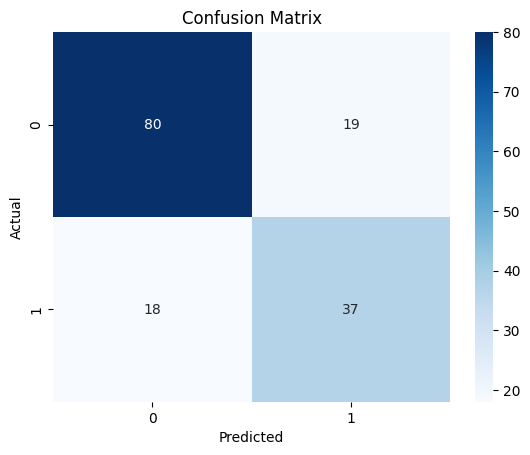

In [33]:
# Вывод матрицы

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.title('Confusion Matrix')

plt.show()

сохраняем модель
import joblib
joblib.dump(model, 'model_diabetes.pkl')